In [213]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

Сгенерируйте случайную матрицу смежности для простого неориентированного взвешенного графа из 100 вершин и 500 ребер с назначенными случайными положительными целыми весами (обратите внимание, что матрица должна быть симметричной и содержать только 0 и веса в качестве элементов). Используйте алгоритмы Дейкстры и Беллмана-Форда, чтобы найти кратчайшие пути между случайной начальной вершиной и другими вершинами. Измерьте время, необходимое для поиска путей каждому алгоритму. Повторите эксперимент 10 раз для одной и той же начальной вершины и рассчитайте среднее время, необходимое для поиска путей каждому алгоритму. Проанализируйте результаты.

In [214]:
def random_matrix(N = 100, V = 200):
    M = np.zeros((N,N))
    vertices = []
    for i in range(V):
        x, y = np.random.randint(0,N,size = 2)
        while (M[x,y] != 0 or M[y,x] != 0) or x==y:
            x, y = np.random.randint(0,N,size = 2)
        value = np.random.random()
        M[x,y] = int(value*100)
        M[y,x] = int(value*100)
        vertices.append((x,y))
    return M, vertices
            

In [249]:
N = 100
V = 500
M, v = random_matrix(N = N, V = V)
M = np.matrix(M)

Count of v is 500
[(95, 61), (45, 78), (54, 49), (2, 62), (6, 57), (82, 86)] ... [(92, 37), (87, 84), (18, 72), (64, 52), (36, 99), (19, 35)]


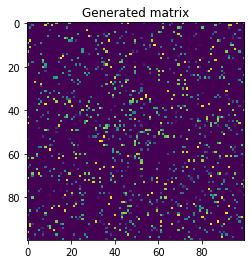

In [250]:
plt.imshow(M)
plt.title("Generated matrix")
print("Count of v is %d"%len(v))
print(v[:6],"...",v[-6:])

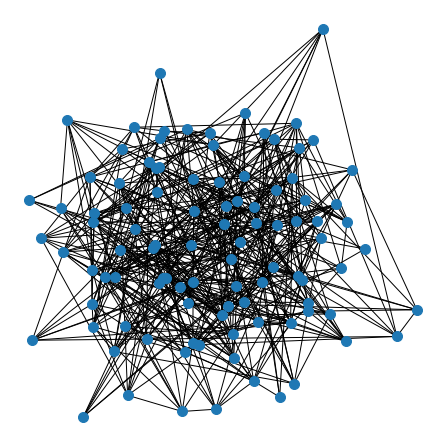

In [251]:
plt.figure(figsize = (6,6))
G = nx.from_numpy_matrix(np.matrix(M))
#edge_labels=nx.draw_networkx_edge_labels(G,pos=nx.spring_layout(G), font_size = 12 )
nx.draw_kamada_kawai(G, node_size = 100)
plt.show()

In [252]:
sourse = np.random.randint(0,N)
target = np.random.randint(0,N)

print("Path from %d to %d"%(sourse, target))
nx.shortest_path(G, source=sourse, target=target, method = 'dijkstra')
#dijkstra’, ‘bellman-ford

Path from 41 to 71


[41, 59, 71]

In [257]:
import time
sourse = np.random.randint(0,N)

times_d = []
times_b = []

for i in range(10):
    a = time.time()
    for i in range(N):
        if i!= sourse:
            target = i
            nx.single_source_bellman_ford(G, sourse, target)
    b = time.time()
    times_d.append(b-a)

for i in range(10):
    a = time.time()    
    for i in range(N):
        if i!= sourse:
            target = i
            nx.dijkstra_path(G, sourse, target)
    b = time.time()
    times_b.append(b-a)

In [258]:
print("Mean dijkstra (10 iterations):", np.mean(times_b))
print("Mean bellman-ford (10 iterations):", np.mean(times_d))

Mean dijkstra (10 iterations): 0.08181538581848144
Mean bellman-ford (10 iterations): 0.41054840087890626


Создайте сетку 10x10 с 30 ячейками-препятствиями. Выберите две случайные разрешенные ячейки и найдите кратчайший путь между ними, используя алгоритм A*. Повторите эксперимент 5 раз с другой случайной парой ячеек. Проанализируйте результаты.

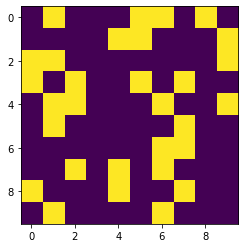

In [134]:
M = np.ones((10,10))
while len(np.where(M == 1)[0]!=30):
    M = np.ones((10,10))
    x = np.random.randint(0,10,size = 100)
    y = np.random.randint(0,10,size = 100)
    M[x,y] = 0
    if len(np.where(M == 1)[0]) == 30:
         break

sourse = np.random.choice
plt.imshow(M)


In [141]:
def neightbours(x,y):
    return ((x-1,y),(x+1, y), (x, y-1), (x, y+1))

def index_matrix(pic):
    x = 0
    shape = pic.shape
    M = np.zeros(shape)
    for i in range(len(pic[0])):
        for j in range(len(pic[1])):
            M[i,j] = x
            x+=1
    return M.astype(int)
            
def pic_to_graph(pic):
    xs, ys = pic.shape
   # print(xs, ys)
    new_pic = np.ones((xs+2, ys+2))
    new_pic[1:-1, 1:-1] = pic.copy()
    edges = []
    index_M = index_matrix(new_pic)
    #print(index_M)
    for i in range(1,11):
        for j in range(1,11):
            n = neightbours(i,j)
           # print(n)
            if new_pic[n[0]] == 0:
                i_0 = index_M[i,j]
                i_1 = index_M[n[0]]
                edges.append((i_0, i_1))
            if new_pic[n[1]] == 0:
                i_0 = index_M[i,j]
                i_1 = index_M[n[1]]
                edges.append((i_0, i_1))
            if new_pic[n[2]] == 0:
                i_0 = index_M[i,j]
                i_1 = index_M[n[2]]
                edges.append((i_0, i_1))
            if new_pic[n[3]] == 0:
                i_0 = index_M[i,j]
                i_1 = index_M[n[3]]
                #print(i_0, i_1)
                edges.append((i_0, i_1))
    return edges

def matrix_from_edges(edges):
    M = np.zeros((12*12,12*12))
    for edge in edges:
        M[int(edge[0]), int(edge[1])] = 1
    return M
            
    
            
            

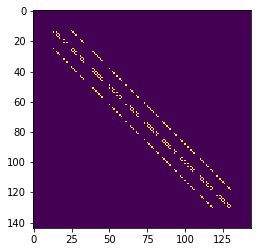

In [151]:
edges = pic_to_graph(M)
path_m =  matrix_from_edges(edges)
plt.imshow(path_m)

In [143]:
path_m = np.matrix(path_m)
G = nx.from_numpy_matrix(np.matrix(path_m))

In [259]:
k = 0
while k!= 5:
        i = np.random.randint(0,100)
        j = np.random.randint(0,100)
        if i == j: continue
        try:
            P = nx.astar_path(G, i, j) 
            print("Path from %d to %d"%(i,j))
            print(list(P))
            print()
            k+=1
        except:
            pass

Path from 4 to 70
[4, 35, 92, 45, 68, 28, 52, 70]

Path from 69 to 80
[69, 83, 67, 34, 21, 32, 80]

Path from 18 to 53
[18, 77, 0, 53]

Path from 61 to 69
[61, 47, 91, 69]

Path from 24 to 80
[24, 45, 51, 65, 21, 32, 80]



In [208]:
list(P)

[58, 57, 56, 55, 54, 53, 52, 64, 63, 75, 74]

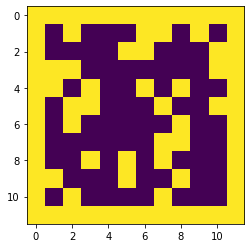

In [209]:
xs, ys = M.shape
new_pic = np.ones((xs+2, ys+2))
new_pic[1:-1, 1:-1] = M.copy()
index_M = index_matrix(new_pic)

plt.imshow(new_pic)

In [210]:
new_pic_pathed = new_pic.copy()
for p in list(P):
    x, y = np.where(index_M == p)
    new_pic_pathed[x[0], y[0]] = 2

x, y = np.where(index_M == P[0])
new_pic_pathed[x[0], y[0]] = 3

x, y = np.where(index_M == P[-1])
new_pic_pathed[x[0], y[0]] = 3
    

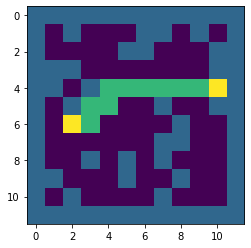

In [211]:
plt.imshow(new_pic_pathed)